[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Heart Disease Tree Classifier

##  Classification - Decision Tree Classifier

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 23/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0043ClassifierDecisionTree.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier


# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF = (8, 8)
ELM_SIZE_DEF = 50
CLASS_COLOR = ('b', 'r')


In [4]:
# Courses Packages
import sys,os
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotConfusionMatrix, PlotLabelsHistogram


In [ ]:
# General Auxiliary Functions


## Exercise - Decision Tree

In this exercise we'll use the _Decision Tree_ model as a classifier.  
The SciKit Learn library implement it with the [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class.  

We'll use the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) (Also known as Cleveland Heard Disease).  
The data set contains binary and categorical features which Decision Trees excel utilizing.  

The data set has the following columns:

- `age`: Age in years.
- `sex`: Sex (`1`: male; `0`: female).
- `cp`: Chest pain type: {`0`: typical angina, `1`: atypical angina, `2`: non-anginal pain, `3`: asymptomatic}.
- `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital).
- `chol`: Serum cholestoral in mg/dl.
- `fbs`: Check fasting blood sugar: {`1`: Above 120 mg/dl, `0`: Below 120 mg/dl}.
- `restecg`: Resting electrocardiographic results: {`0`: normal, `1`: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), `2`: showing probable or definite left ventricular hypertrophy by Estes' criteria}.
- `thalach`: Maximum heart rate achieved.
- `exang`: Exercise induced angina: {`1`: yes, `0`: no}.
- `oldpeak` = ST depression induced by exercise relative to rest.
- `slope`: The slope of the peak exercise ST segment: {`0`: upsloping, `1`: flat, `2`: downsloping}.
- `ca`: Number of major vessels (0-3) colored by flourosopy.
- `thal`: {`0`: normal, `1`: fixed defect, `2`: reversable defect}.
- `num`: The target variable: {`0`: `<50` (No disease), `1`: `>50_1` (disease)}.

The exercise will also show the process of handling real world data: Removing invalid data, mapping values, etc...

I this exercise we'll do the following:

1. Load the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) using `fetch_openml()` with id .
2. Validate data.
3. Convert text to numerical data (Though still as categorical data).
4. Train a decision tree.
5. Optimize the parameters: `criterion` and `max_leaf_nodes` by the `f1` score.
6. Train the optimal model on all data.
7. Display the Confusion Matrix and extract the different types of predictions.
8. Show the feature importance rank of the model.

* <font color='brown'>(**#**)</font> In order to let the classifier know the data is binary / categorical we'll use a **Data Frame** as the data structure.

In [5]:
# Parameters

#===========================Fill This===========================#
# 1. Set the options for the `criterion` parameter (Use all options).
# 2. Set the options for the `max_leaf_nodes` parameter.
lCriterion   = ['gini', 'entropy', 'log_loss'] #<! List
lMaxLeaf     = np.linspace(2,20,10) #<! List
#===============================================================#



## Generate / Load Data


In [6]:
# Load Data

dfData, dsY = fetch_openml('heart-c', version = 1, return_X_y = True, as_frame = True, parser = 'auto')

print(f'The data shape: {dfData.shape}')
print(f'The labels shape: {dsY.shape}')
print(f'The unique values of the labels: {dsY.unique()}')

The data shape: (303, 13)
The labels shape: (303,)
The unique values of the labels: ['<50', '>50_1']
Categories (2, object): ['<50', '>50_1']


### Plot Data

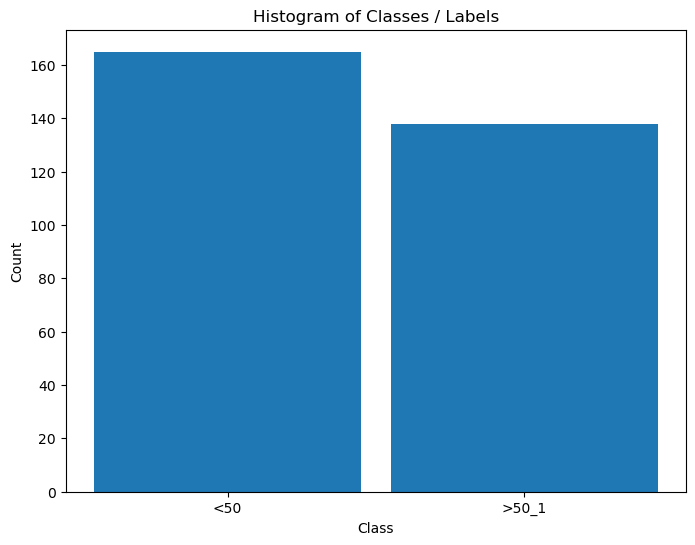

In [7]:
# Distribution of Labels

hA = PlotLabelsHistogram(dsY)
plt.show()


* <font color='red'>(**?**)</font> Is the data balanced?

## Pre Process Data

In this section we'll transform the data into features which the algorithms can work with.

### Remove Missing / Undefined Values

There are 3 main strategies with dealing with missing values:
1. A model to interpolate them.
2. Remove the sample.
3. Remove the feature.

The choice between (2) and (3) depends on the occurrence of the missing values.  
If there is a feature which is dominated by missing values, we might want to consider remove it.  
Otherwise, we'll remove samples with missing values.

* <font color='brown'>(**#**)</font> In case of large data set we might even build different models to different combinations of features.
* <font color='brown'>(**#**)</font> If missing values can happen in production, we need to think of a strategy that holds in that case as well.
* <font color='brown'>(**#**)</font> In practice, another factor to take into account is the importance of the feature.

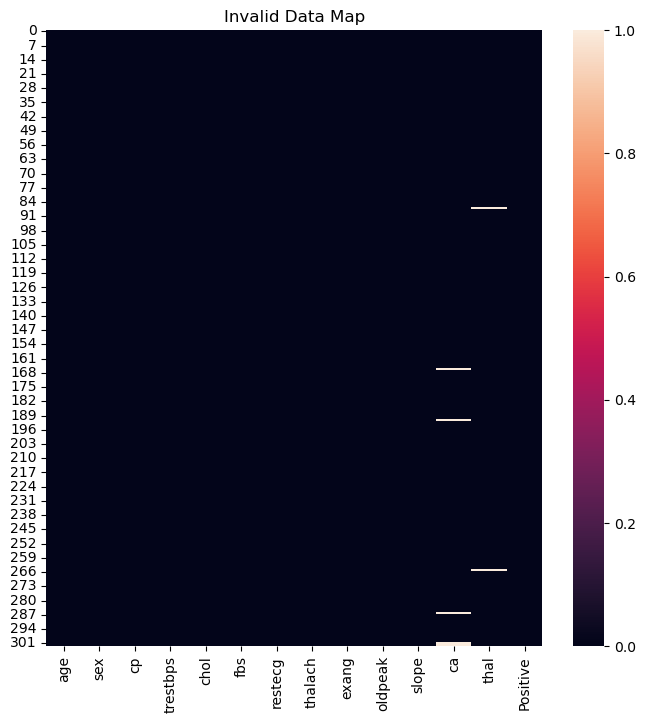

The features data shape: (303, 14)


In [10]:
# Null / NA / NaN Matrix

dfData['Positive'] = dsY #<! Merge data

#===========================Fill This===========================#
# 1. Calculate the logical map of invalid values using the method `isna()`.
dfInvData = dfData.isna() #<! The logical matrix (DF) of invalid values
#===============================================================#

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
sns.heatmap(data = dfInvData, square = False, ax = hA)
hA.set_title('Invalid Data Map')

plt.show()

print(f'The features data shape: {dfData.shape}')


* <font color='red'>(**?**)</font> Given the results above, would you remove a feature or few samples?

In [9]:
# Remove NaN / Null Values

#===========================Fill This===========================#
# 1. Remove the NaN / Null values. Use `dropna()`.
# !! Choose the correct policy (Remove samples or features) by `axis`.
dfX = dfData.dropna(axis = 0) #<! Remove samples
#===============================================================#

print(f'The features data shape: {dfX.shape}')

The features data shape: (296, 14)


In [11]:
# Drop Duplicate Rows

#===========================Fill This===========================#
# 1. Drop duplicate rows (Samples) using the method `drop_duplicates()`.
# 2. Reset index using the method `reset_index()` .
dfX = dfX.drop_duplicates()
print(f'dfX shape after drop: {dfX.shape}')

dfX = dfX.reset_index(drop = True)
print(f'dfX shape after reset_index: {dfX.shape}')
#===============================================================#
dfX = dfX.astype(dtype = {'ca': np.int64}) #<! It's integer mistyped as Float64

dfX shape after drop: (296, 14)
dfX shape after reset_index: (296, 14)


In [12]:
# Split Data & Labels
# Create the X, y data.

dsY = dfX['Positive']
dfX = dfX.drop(columns = ['Positive'])

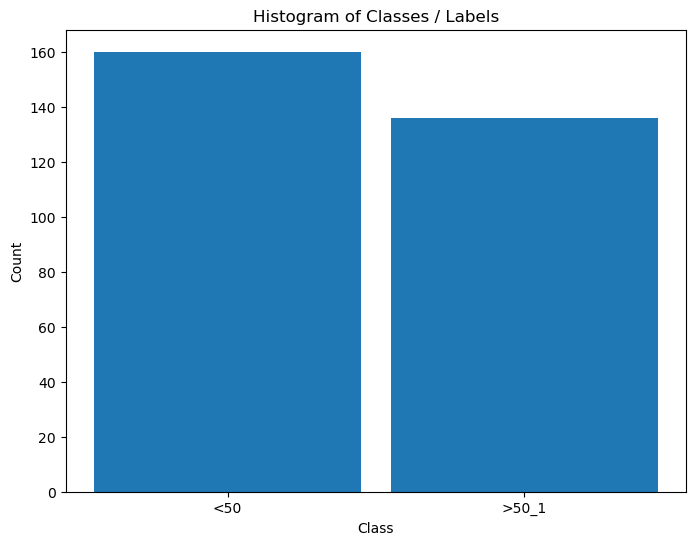

In [13]:
# Distribution of Labels

hA = PlotLabelsHistogram(dsY)
plt.show()

### Convert Data into Numeric Values

Some of the categorical and binary data is given by text values.  
It is better to convert them into numerical values (Though some models can work with them as is).  
For some visualizations, the textual data is great, hence we keep it.


* <font color='brown'>(**#**)</font> Usually this is done as part of the pipeline. See [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [`Binarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html) and [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) in the [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module.
* <font color='brown'>(**#**)</font> Currently, the implementation of [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) doesn't support categorical values which are not ordinal (As it treats them as numeric). Hence we must use `OneHotEncoder`.  
See status at https://github.com/scikit-learn/scikit-learn/pull/12866.
* <font color='brown'>(**#**)</font> The _One Hot Encoding_ is not perfect. See [Are Categorical Variables Getting Lost in Your Random Forests](https://web.archive.org/web/20200307172925/https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/) (Also [Notebook - Are Categorical Variables Getting Lost in Your Random Forests](https://notebook.community/roaminsight/roamresearch/BlogPosts/Categorical_variables_in_tree_models/categorical_variables_post)). 
* <font color='brown'>(**#**)</font> The SciKit Learn has support for categorical features in the [`HistGradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html) class.


In [14]:
# Features Type

# See the Type of the Features
dfX.info() #<! Look at `dfX.dtypes`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       296 non-null    int64   
 1   sex       296 non-null    category
 2   cp        296 non-null    category
 3   trestbps  296 non-null    int64   
 4   chol      296 non-null    int64   
 5   fbs       296 non-null    category
 6   restecg   296 non-null    category
 7   thalach   296 non-null    int64   
 8   exang     296 non-null    category
 9   oldpeak   296 non-null    float64 
 10  slope     296 non-null    category
 11  ca        296 non-null    int64   
 12  thal      296 non-null    category
dtypes: category(7), float64(1), int64(5)
memory usage: 17.0 KB


In [15]:
# Lists of the Features Type

lBinaryFeature  = ['sex', 'fbs', 'exang']
lCatFeature     = ['cp', 'restecg', 'slope', 'thal']
lNumFeature     = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [16]:
# Creating a Copy (Numerical)

#===========================Fill This===========================#
# 1. Create a copy (Not a view) using the method `copy()`.
dfXNum = dfX.copy()
#===============================================================#

In [17]:
# Encode Binary Categorical Features
# Usually this is done using `Binarizer` and `OrdinalEncoder`.
# Yet there is a defined mapping in the data description which will be used.

dSex        = {'female': 0, 'male': 1}
dCp         = {'typ_angina': 0, 'atyp_angina': 1, 'non_anginal': 2, 'asympt': 3}
dFbs        = {'f': 0, 't': 1}
dRestEcg    = {'normal': 0, 'st_t_wave_abnormality': 1, 'left_vent_hyper': 2}
dExAng      = {'no': 0, 'yes': 1}
dSlope      = {'up': 0, 'flat': 1, 'down': 2}
dThal       = {'normal': 0, 'fixed_defect': 1, 'reversable_defect': 2}

dMapper = {'sex': dSex, 'fbs': dFbs, 'exang': dExAng, 'cp': dCp, 'restecg': dRestEcg, 'slope': dSlope, 'thal': dThal}

for colName in (lBinaryFeature + lCatFeature):
    # dMapping = dMapper[colName]
    dfXNum[colName] = dfXNum[colName].map(dMapper[colName])


In [18]:
dfXNum.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0


In [19]:
# Encode the Labels

#===========================Fill This===========================#
# 1. Create a dictionary which maps the string `<50` to 0 and `>50_1` to 1.
# 2. Apply a mapping on `dsY` using the method `map()`.
dMapY   = {'<50': 0, '>50_1': 1} #<! Mapping dictionary
dsY     = dsY.map(dMapY)
#===============================================================#

dsY = dsY.rename('Positive')
dsY.head()

0    0
1    1
2    1
3    0
4    0
Name: Positive, dtype: category
Categories (2, int64): [0, 1]

### Exploratory Data Analysis (EDA)

This is the stage we're trying to infer insights on the data using visualizations.  
This is a skill which requires experience and creativity.  

We'll do some very basic operations for this data set.  
We'll see the distribution of each feature for the 2 values.


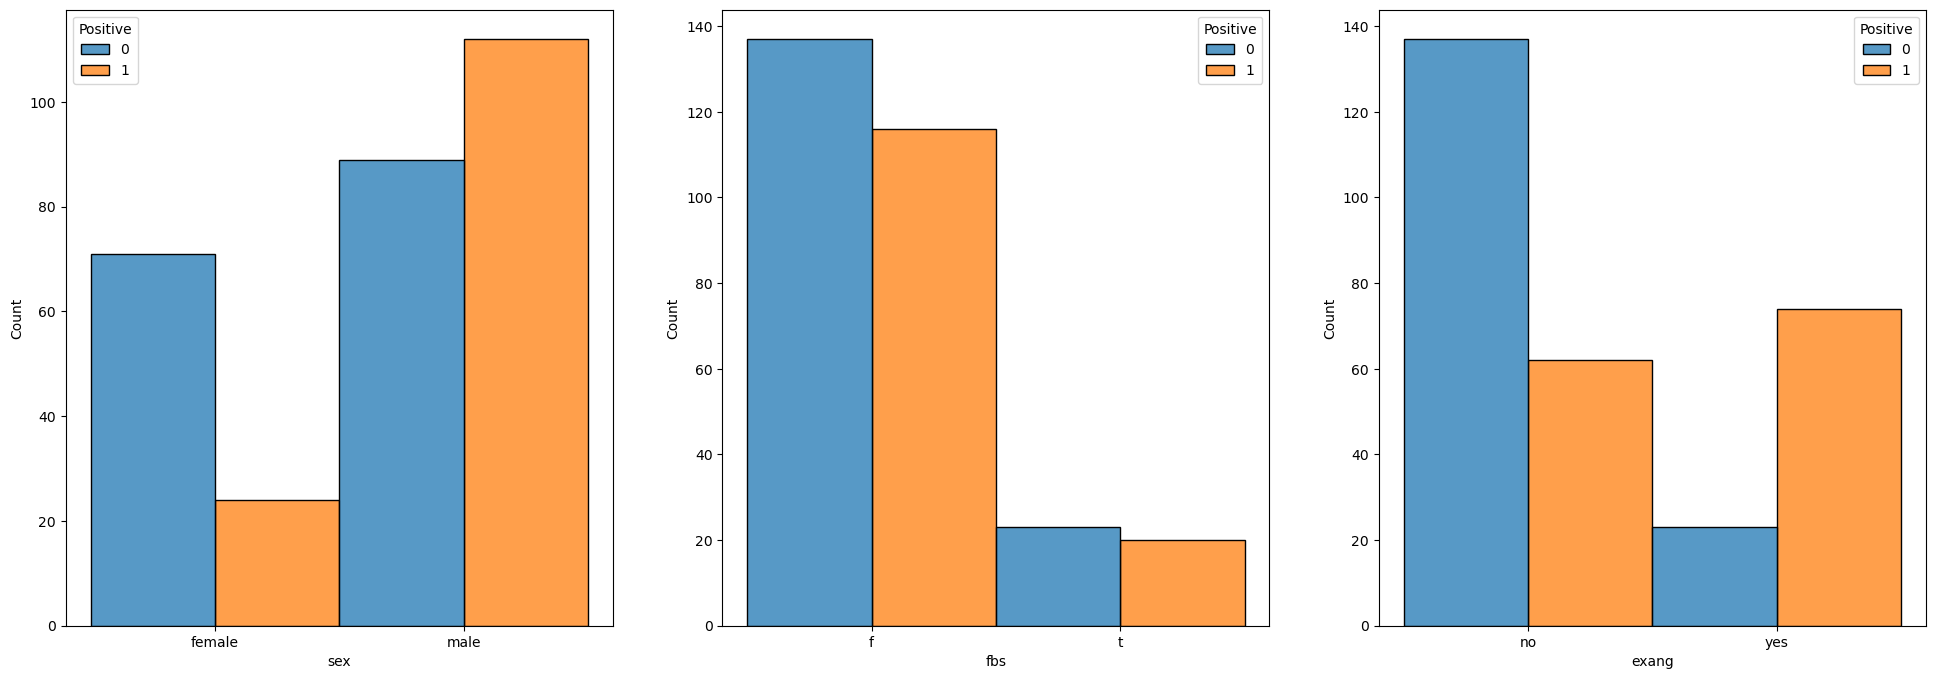

In [20]:
# Binary Data

numFeatures = len(lBinaryFeature)
hF, hA = plt.subplots(1, numFeatures, figsize = (24, 8))
hA = hA.flat

for ii, colName in enumerate(lBinaryFeature):
    sns.histplot(data = dfX, x = colName, hue = dsY, discrete = True, multiple = 'dodge', ax = hA[ii])

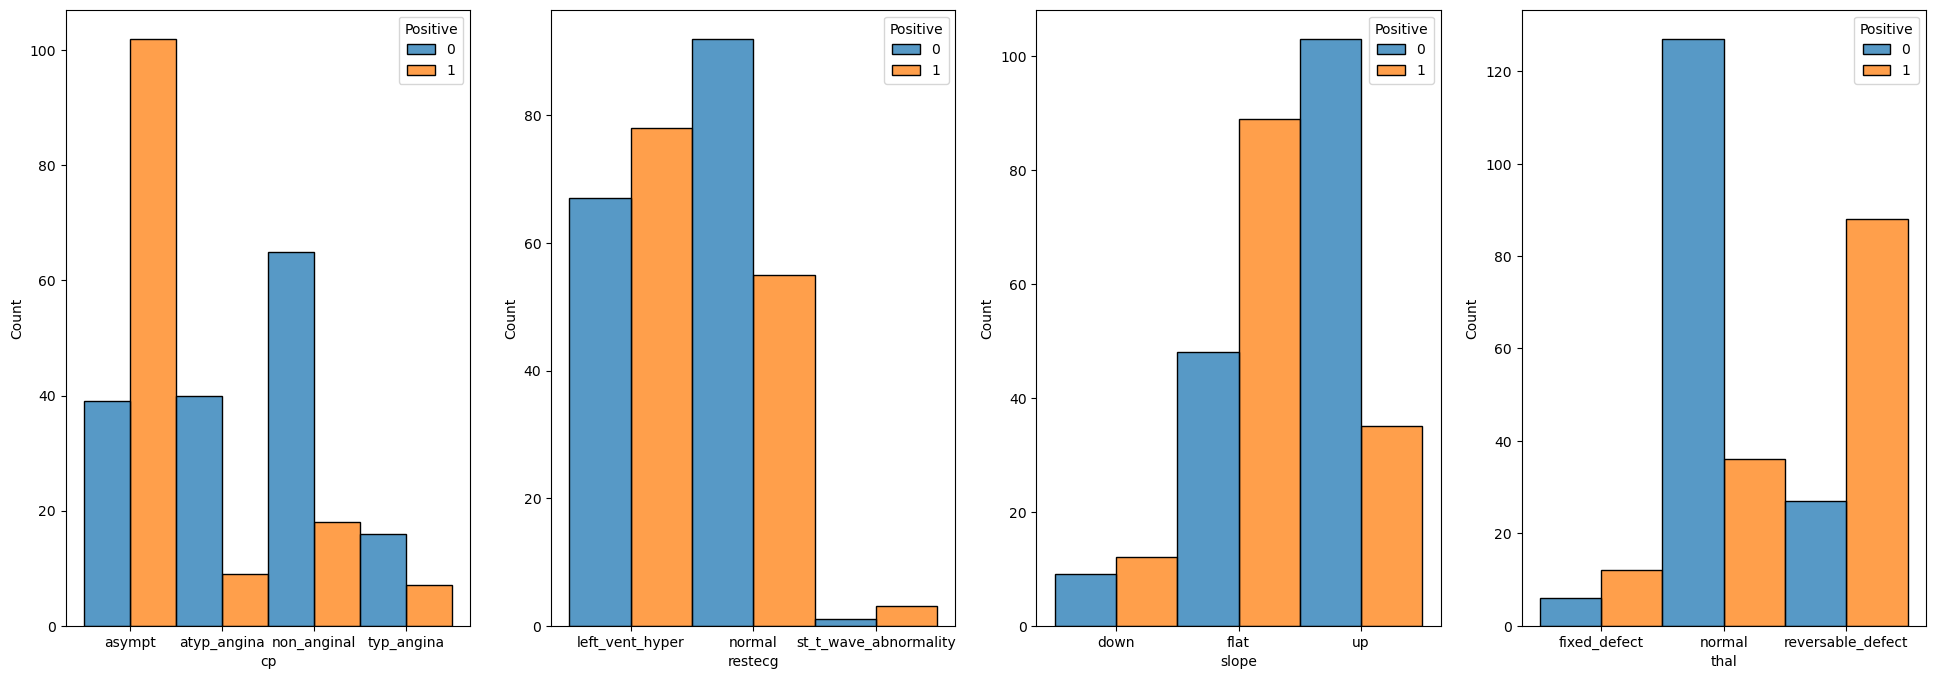

In [21]:
# Categorical Data

numFeatures = len(lCatFeature)
hF, hA = plt.subplots(1, numFeatures, figsize = (24, 8))
hA = hA.flat

for ii, colName in enumerate(lCatFeature):
    sns.histplot(data = dfX, x = colName, hue = dsY, discrete = True, multiple = 'dodge', ax = hA[ii])

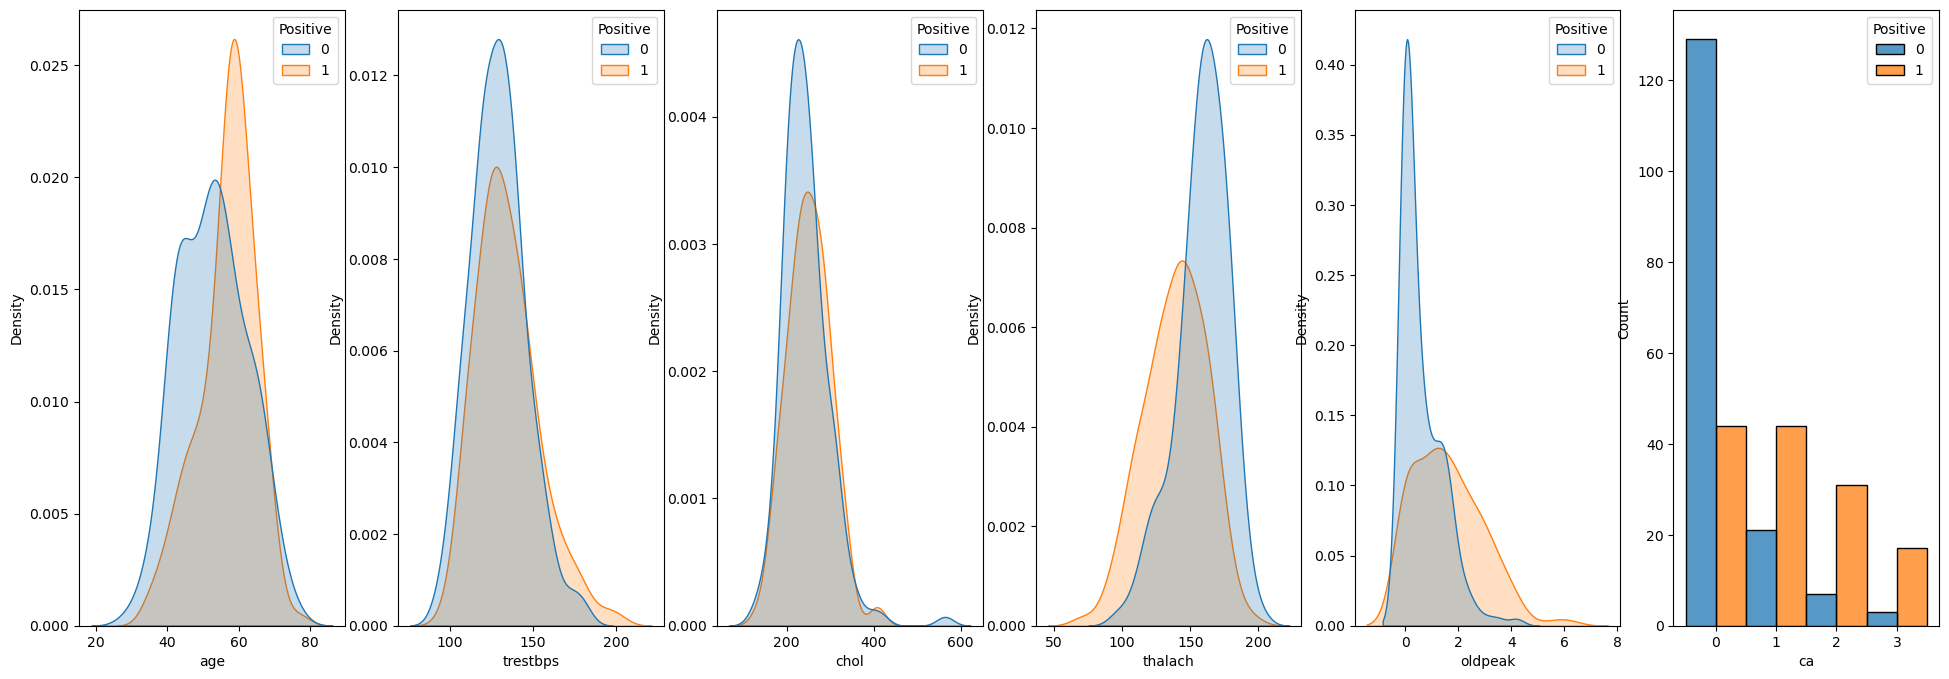

In [22]:
# Numerical Data

lDiscreteData = []

numFeatures = len(lNumFeature)
hF, hA = plt.subplots(1, numFeatures, figsize = (24, 8))
hA = hA.flat

for ii, colName in enumerate(lNumFeature):
    # if pd.api.types.is_integer_dtype(dfX[colName]):
    #     sns.histplot(data = dfX, x = colName, hue = dsY, discrete = True, multiple = 'dodge', ax = hA[ii])
    if colName == 'ca':
        sns.histplot(data = dfX, x = colName, hue = dsY, discrete = True, multiple = 'dodge', ax = hA[ii])
    else:
        sns.kdeplot(data = dfX, x = colName, hue = dsY, fill = True, common_norm = True, ax = hA[ii])

* <font color='red'>(**?**)</font> How would you handle the case where a feature has a single value? Look at [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold).
* <font color='brown'>(**#**)</font> Usually part of the work on feature includes a process to select the best of them. For example a brute force method is given by [`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

## Train a Decision Tree Model and Optimize Hyper Parameters

In this section we'll optimize the model according to the `F1` score.  
The `F1` score is the geometric mean of the _precision_ and _recall_.  
Hence it can handle pretty well imbalanced data as well (Though this case is not really that imbalanced).

We'll use the `f1_score()` function to calculate the measure.  
The process to optimize the _Hyper Parameters_ will be as following:

1. Build a data frame to keep the scoring of the different hyper parameters combination.
2. Optimize the model:
  - Construct a model using the current combination of _hyper parameters_.
  - Apply a cross validation process to predict the data using `cross_val_predict()`.
  - As the cross validation iterator (The `cv` parameter) use `KFold` to implement _Leave One Out_ policy.
3. Calculate the `F1` score of the predicted classes.
4. Store the result in the performance data frame.


* <font color='brown'>(**#**)</font> Pay attention that while we optimize the hyper parameters according to the `F1` score, the model itself has a different _loss_ function.

In [23]:
# Creating the Data Frame

#===========================Fill This===========================#
# 1. Calculate the number of combinations.
# 2. Create a nested loop to create the combinations between the parameters.
# 3. Store the combinations as the columns of a data frame.

# For Advanced Python users: Use iteration tools for create the cartesian product
numComb = len(lCriterion) * len(lMaxLeaf)  #<! Number combinations
dData   = {'Criterion': [], 'Max Leaves': [], 'F1': [0.0] * numComb}  #<! Dictionary (To create the DF from)

for ii, paramCriteria in enumerate(lCriterion):
    for jj, maxLeaf in enumerate(lMaxLeaf):
        dData['Criterion'].append(paramCriteria)
        dData['Max Leaves'].append(maxLeaf)
        
#===============================================================#

# The DF: Each row is a combination to evaluate.
# The columns are the parameters and the F1 score.
dfModelScore = pd.DataFrame(data = dData)

# Display the DF
dfModelScore



,Criterion,Max Leaves,F1
0,gini,2.0,0.0
1,gini,4.0,0.0
2,gini,6.0,0.0
3,gini,8.0,0.0
4,gini,10.0,0.0
5,gini,12.0,0.0
6,gini,14.0,0.0
7,gini,16.0,0.0
8,gini,18.0,0.0
9,gini,20.0,0.0


In [26]:
# Optimize the Model

#===========================Fill This===========================#
# 1. Iterate over each row of the data frame `dfModelScore`. Each row defines the hyper parameters.
# 2. Construct the model.
# 3. Train it on the Train Data Set.
# 4. Calculate the score.
# 5. Store the score into the data frame column.

for ii in range(numComb):
    paramCriteria    = dfModelScore['Criterion'][ii]
    maxLeaf          = dfModelScore['Max Leaves'][ii]

    print(f'Processing model {ii + 1:03d} out of {numComb} with `criterion` = {paramCriteria} and `max_leaf_nodes` = {maxLeaf}.')

    oDecTreeCls = DecisionTreeClassifier(criterion = paramCriteria, max_leaf_nodes = int(maxLeaf), random_state = 0) #<! The model with the hyper parameters of the current combination
    
    vYPred = cross_val_predict(oDecTreeCls, dfXNum, dsY, cv = KFold(n_splits = dfXNum.shape[0])) #<! Predict by cross validation

    f1Score = f1_score(dsY, vYPred)
    dfModelScore.loc[ii, 'F1'] = f1Score
    print(f'Finished processing model {ii + 1:03d} with `f1 = {f1Score}.')
#===============================================================#

Processing model 001 out of 30 with `criterion` = gini and `max_leaf_nodes` = 2.0.
Finished processing model 001 with `f1 = 0.7434944237918215.
Processing model 002 out of 30 with `criterion` = gini and `max_leaf_nodes` = 4.0.
Finished processing model 002 with `f1 = 0.6899563318777293.
Processing model 003 out of 30 with `criterion` = gini and `max_leaf_nodes` = 6.0.
Finished processing model 003 with `f1 = 0.7984496124031008.
Processing model 004 out of 30 with `criterion` = gini and `max_leaf_nodes` = 8.0.
Finished processing model 004 with `f1 = 0.7380952380952381.
Processing model 005 out of 30 with `criterion` = gini and `max_leaf_nodes` = 10.0.
Finished processing model 005 with `f1 = 0.7330677290836654.
Processing model 006 out of 30 with `criterion` = gini and `max_leaf_nodes` = 12.0.
Finished processing model 006 with `f1 = 0.728.
Processing model 007 out of 30 with `criterion` = gini and `max_leaf_nodes` = 14.0.
Finished processing model 007 with `f1 = 0.7193675889328063.
Pr

* <font color='red'>(**?**)</font> Should we use _Stratified K Fold_ above? Why?
* <font color='brown'>(**#**)</font> Pay attention to the speed of the process. This is one of the main advantages of models based on trees.

In [28]:
# Display Sorted Results (Descending)
# Pandas allows sorting data by any column using the `sort_values()` method.
# The `head()` allows us to see only the the first values.
dfModelScore.sort_values(by = ['F1'], ascending = False).head(10)

,Criterion,Max Leaves,F1
2,gini,6.0,0.798450
16,entropy,14.0,0.749035
26,log_loss,14.0,0.749035
20,log_loss,2.0,0.743494
10,entropy,2.0,0.743494
0,gini,2.0,0.743494
3,gini,8.0,0.738095
22,log_loss,6.0,0.734694
12,entropy,6.0,0.734694
4,gini,10.0,0.733068


* <font color='red'>(**?**)</font> Do you find results satisfactory? How would you answer this?  
   See the _Code 001_ below.
* <font color='green'>(**@**)</font> Since the class `DecisionTreeClassifier` doesn't really support categorical features, you may use _One Hot Encoding_.  
   See [Pandas' `get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). You may use _Code 002_ below.


```python
# Code 001
from sklearn.linear_model import LogisticRegression

oCls = LogisticRegression(max_iter = 10_000)
oCls = oCls.fit(dfXNum, dsY)
f1_score(dsY, oCls.predict(dfXNum))
```

```python
# Code 002
dfXCat = dfXNum.copy()

for colName in lCatFeature:
    dfTmp = pd.get_dummies(dfXNum[colName], prefix = colName)
    dfXCat = pd.concat((dfXCat, dfTmp), axis = 1)
    dfXCat = dfXCat.drop(columns = colName)

dfXCat
```


<!-- from sklearn.ensemble import HistGradientBoostingClassifier

oCls = HistGradientBoostingClassifier(max_iter = 100, max_leaf_nodes = 20, categorical_features = lBinaryFeature + lCatFeature)
oCls = oCls.fit(dfXNum, dsY)
f1_score(dsY, oCls.predict(dfXNum)) -->

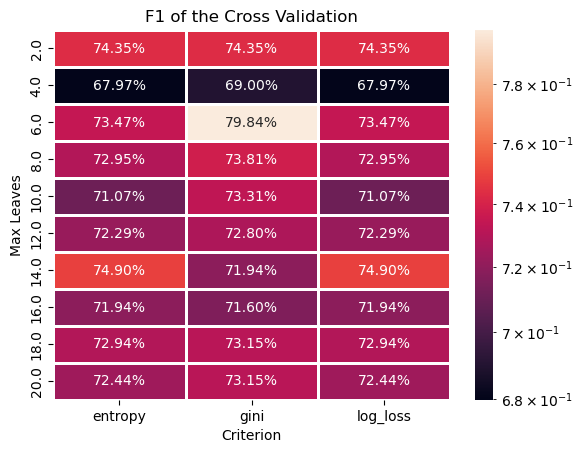

In [27]:
# Plotting the Train Data F1 as a Heat Map
# We can pivot the data set created to have a 2D matrix of the `F1` as a function of `Criterion` and the `Max Leaves`.

hA = sns.heatmap(data = dfModelScore.pivot(index = 'Max Leaves', columns = 'Criterion', values = 'F1'), robust = True, linewidths = 1, annot = True, fmt = '0.2%', norm = LogNorm())
hA.set_title('F1 of the Cross Validation')
plt.show()

In [29]:
# Extract the Optimal Hyper Parameters

#===========================Fill This===========================#
# 1. Extract the index of row which maximizes the score.
# 2. Use the index of the row to extract the hyper parameters which were optimized.
# !! You may find the `idxmax()` method of a Pandas data frame useful.

idxArgMax = dfModelScore['F1'].idxmax()
#===============================================================#

optimalCriterion = dfModelScore.loc[idxArgMax, 'Criterion']
optimalMaxLeaf   = dfModelScore.loc[idxArgMax, 'Max Leaves']

print(f'The optimal hyper parameters are: `criterion` = {optimalCriterion}, `max_leaf_nodes` = {optimalMaxLeaf}')



The optimal hyper parameters are: `criterion` = gini, `max_leaf_nodes` = 6.0


### Optimal Model

In this section we'll extract the best model an retrain it on the whole data (`dfXNum`).  
We need to export the model which has the best Test values.

In [31]:
# Construct the Optimal Model & Train on the Whole Data

#===========================Fill This===========================#
# 1. Construct the model with the optimal hyper parameters.
# 2. Fit the model on the whole data set.
oDecTreeCls = DecisionTreeClassifier(criterion = optimalCriterion, max_leaf_nodes = int(optimalMaxLeaf))
oDecTreeCls = oDecTreeCls.fit(dfXNum, dsY)
#===============================================================#

In [32]:
# Model Score (Accuracy)

print(f'The model score (Accuracy) is: {oDecTreeCls.score(dfXNum, dsY):0.2%}.')

The model score (Accuracy) is: 85.14%.


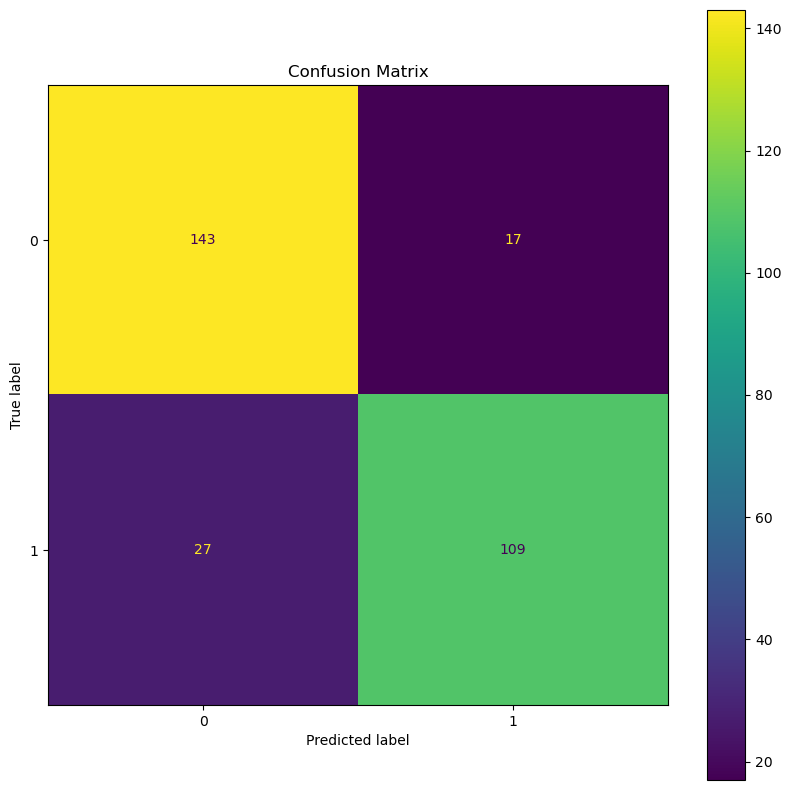

In [33]:
# Plot the Confusion Matrix
hF, hA = plt.subplots(figsize = (10, 10))

#===========================Fill This===========================#
# 1. Plot the confusion matrix using the `PlotConfusionMatrix()` function.
hA, mConfMat = PlotConfusionMatrix(dsY, oDecTreeCls.predict(dfXNum), hA = hA)
#===============================================================#

plt.show()

* <font color='red'>(**?**)</font> Calculate the TP, TN, FP and FN rates. 
* <font color='red'>(**?**)</font> Calculate the _precision_ and _recall_.
* <font color='red'>(**?**)</font> Calculate the _precision_ and _recall_ assuming the labels `0` is the positive label.

## Feature Significance

One advantage of the decision tree based models is having access to the significance of each feature during training.  
We can access it using the `feature_importances_` attribute (Only after a applying training by the `fit()` method).

* <font color='brown'>(**#**)</font> This ability is useful as a pre processing of data for any model with no restriction to trees.
* <font color='brown'>(**#**)</font> The idea is measuring the total contribution of the feature to the reduction in loss.
* <font color='brown'>(**#**)</font> This is a good metric for importance mainly for categorical features. For features with high number of unique values (Continuous), it might be not as accurate.

In [34]:
# Extract the Importance of the Features

#===========================Fill This===========================#
# 1. Extract the feature importance using the `feature_importances_` attribute.
vFeatImportance = oDecTreeCls.feature_importances_
#===============================================================#

The feature importance is normalized, hence we can display it like a discrete probability mass function.

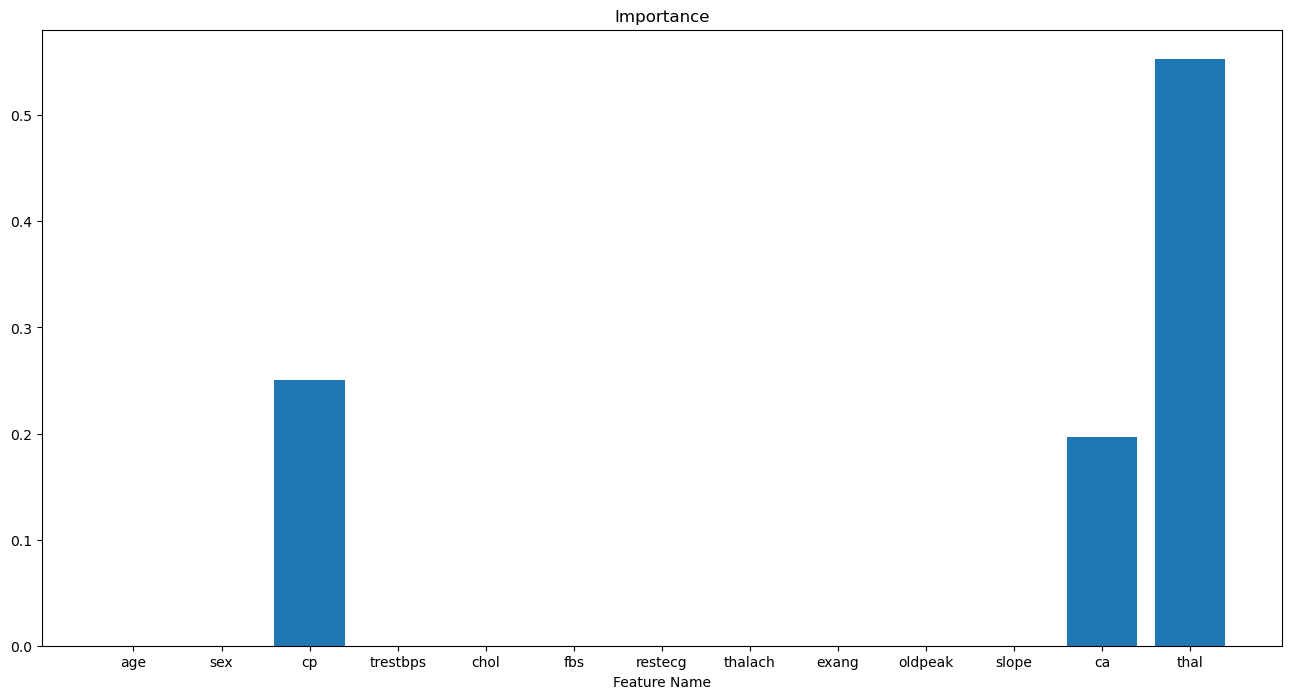

In [35]:
# Plot the Feature Importance

hF, hA = plt.subplots(figsize = (16, 8))
hA.bar(x = dfXNum.columns, height = vFeatImportance)
hA.set_title('Features Importance of the Model')
hA.set_xlabel('Feature Name')
hA.set_title('Importance')

plt.show()

* <font color='red'>(**?**)</font> How many non zero values could we have? Look at the number of splits.
* <font color='red'>(**?**)</font> What can be done with the features with low value?
* <font color='brown'>(**#**)</font> Can you explain what you see with the EDA phase plots?
* <font color='brown'>(**#**)</font> Pay attention, in the context of feature importance we may choose high number of splits even if it means overfit. It won't be a model for production, but will give a better view of the features.